# 📊 Data Preprocessing for Handwritten Digit Recognition

## Project Overview
This notebook handles all **data preprocessing** tasks for the DIDA (10k) dataset:

1. **Load** images from the raw dataset folders
2. **Convert** images to 784-dimensional feature vectors (28×28 flattened)
3. **Normalize** pixel values to [0, 1] range
4. **Split** data into training (80%) and testing (20%) sets
5. **Save** processed data for reuse in model training

---
**Author:** Omar  
**Dataset:** DIDA 10k Handwritten Digit Dataset

## Step 1: Import Required Libraries

We need the following libraries:
- **NumPy**: For numerical operations and array handling
- **PIL (Pillow)**: For reading and processing images
- **scikit-learn**: For splitting data into train/test sets
- **os/pathlib**: For file and folder operations
- **matplotlib**: For visualizing images and data

In [ ]:
# Import required libraries
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## Step 2: Define Configuration

Here we set up all the paths and parameters we'll use:
- **RAW_DATA_PATH**: Where the original images are stored (organized by digit folders 0-9)
- **PROCESSED_DATA_PATH**: Where we'll save the processed data
- **IMAGE_SIZE**: Target size for all images (28×28 pixels)
- **TEST_SIZE**: Percentage of data used for testing (20%)

In [ ]:
# ============================================================
# CONFIGURATION
# ============================================================

RAW_DATA_PATH = Path("../data/raw/10000")        # Where raw images are stored
PROCESSED_DATA_PATH = Path("../data/processed")   # Where to save processed data
IMAGE_SIZE = (28, 28)                             # Target image size (28x28 pixels)
TEST_SIZE = 0.2                                   # 20% for testing, 80% for training

print("📁 Configuration:")
print(f"   • Raw data path:       {RAW_DATA_PATH}")
print(f"   • Processed data path: {PROCESSED_DATA_PATH}")
print(f"   • Image size:          {IMAGE_SIZE[0]}×{IMAGE_SIZE[1]} pixels")
print(f"   • Test size:           {TEST_SIZE*100:.0f}%")

📁 Configuration:
   • Raw data path:       ..\data\raw\10000
   • Processed data path: ..\data\processed
   • Image size:          28×28 pixels
   • Test size:           20%


## Step 3: Create Helper Functions

### 3.1 Load Images from a Folder
This function:
1. Reads all images from a specific digit folder
2. Converts each image to grayscale (black and white)
3. Resizes to 28×28 pixels
4. Flattens the 2D image into a 1D array of 784 numbers

**Why flatten?**
- Original image: 28×28 grid (2D)
- After flattening: 784 numbers in a row (1D)
- Machine learning models expect 1D input

In [ ]:
def load_images_from_folder(folder_path, label):
    """
    Load all images from a folder and assign them a label.
    
    Parameters:
    -----------
    folder_path : Path
        Path to the folder containing images
    label : int
        The digit label (0-9) for all images in this folder
    
    Returns:
    --------
    images : list - List of flattened image arrays (784 dimensions each)
    labels : list - List of corresponding labels
    """
    images = []
    labels = []
    
    # Get all image files in the folder (jpg, jpeg, png)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    for image_file in image_files:
        image_path = folder_path / image_file
        try:
            # Step 1: Open the image
            img = Image.open(image_path)
            
            # Step 2: Convert to grayscale (L = luminance = grayscale)
            img = img.convert('L')
            
            # Step 3: Resize to 28x28 pixels
            img = img.resize(IMAGE_SIZE, Image.Resampling.LANCZOS)
            
            # Step 4: Convert to numpy array
            img_array = np.array(img)
            
            # Step 5: Flatten from 28x28 (2D) to 784 (1D)
            img_flattened = img_array.flatten()
            
            images.append(img_flattened)
            labels.append(label)
            
        except Exception as e:
            print(f"⚠️ Error loading {image_path}: {e}")
    
    return images, labels

print("✅ Function 'load_images_from_folder' created!")

✅ Function 'load_images_from_folder' created!


### 3.2 Load the Entire Dataset
This function loops through all 10 digit folders (0-9) and loads all images.

In [ ]:
def load_dataset(data_path):
    """
    Load the entire DIDA dataset from all digit folders (0-9).
    
    Parameters:
    -----------
    data_path : Path - Path to the root data folder
    
    Returns:
    --------
    X : numpy.ndarray - Feature matrix of shape (n_samples, 784)
    y : numpy.ndarray - Label array of shape (n_samples,)
    """
    all_images = []
    all_labels = []
    
    print("📂 Loading dataset from folders...")
    print("-" * 50)
    
    # Loop through each digit folder (0-9)
    for digit in range(10):
        folder_path = data_path / str(digit)
        
        if folder_path.exists():
            images, labels = load_images_from_folder(folder_path, digit)
            all_images.extend(images)
            all_labels.extend(labels)
            print(f"   Digit {digit}: ✅ Loaded {len(images)} images")
        else:
            print(f"   Digit {digit}: ❌ Folder not found!")
    
    print("-" * 50)
    print(f"📊 Total images loaded: {len(all_images)}")
    
    # Convert lists to numpy arrays
    X = np.array(all_images)
    y = np.array(all_labels)
    
    return X, y

print("✅ Function 'load_dataset' created!")

✅ Function 'load_dataset' created!


## Step 4: Load the Raw Dataset

Now let's actually load all the images from the DIDA dataset!

In [ ]:
# Load all images from the dataset
X, y = load_dataset(RAW_DATA_PATH)

print(f"\n📊 Dataset loaded!")
print(f"   • X shape: {X.shape} (samples × features)")
print(f"   • y shape: {y.shape} (labels)")

📂 Loading dataset from folders...
--------------------------------------------------
   Digit 0: ✅ Loaded 1000 images
   Digit 1: ✅ Loaded 1000 images
   Digit 2: ✅ Loaded 1000 images
   Digit 3: ✅ Loaded 1000 images
   Digit 4: ✅ Loaded 1000 images
   Digit 5: ✅ Loaded 1000 images
   Digit 6: ✅ Loaded 1000 images
   Digit 7: ✅ Loaded 1000 images
   Digit 8: ✅ Loaded 1000 images
   Digit 9: ✅ Loaded 1000 images
--------------------------------------------------
📊 Total images loaded: 10000

📊 Dataset loaded!
   • X shape: (10000, 784) (samples × features)
   • y shape: (10000,) (labels)


## Step 5: Visualize Sample Images

Let's see what some of the images look like! We'll display one sample from each digit (0-9).

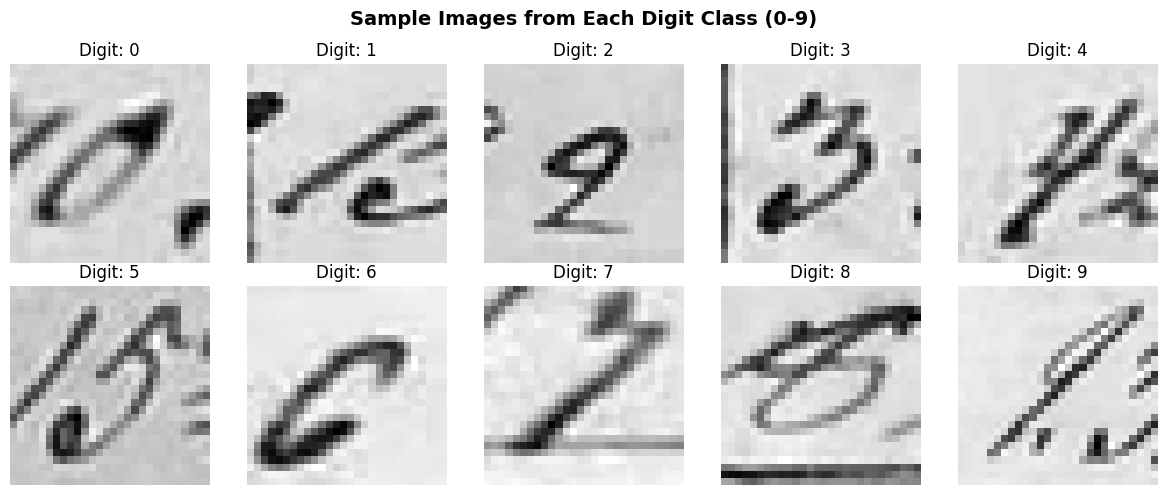

👆 These are sample handwritten digits from the DIDA dataset


In [ ]:
# Display sample images from each digit class
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample Images from Each Digit Class (0-9)', fontsize=14, fontweight='bold')

for digit in range(10):
    # Find the first image with this label
    idx = np.where(y == digit)[0][0]
    
    # Reshape from 784 back to 28x28 for display
    image = X[idx].reshape(28, 28)
    
    # Plot
    row, col = digit // 5, digit % 5
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'Digit: {digit}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("👆 These are sample handwritten digits from the DIDA dataset")

## Step 6: Normalize Pixel Values

### Why Normalize?
- **Before**: Pixel values range from 0 (black) to 255 (white)
- **After**: Pixel values range from 0.0 to 1.0

### Benefits:
1. **Faster training**: Smaller numbers = faster calculations
2. **Better convergence**: ML algorithms work better with normalized data
3. **Numerical stability**: Prevents overflow/underflow issues

In [ ]:
# Check values BEFORE normalization
print("📊 BEFORE Normalization:")
print(f"   • Min pixel value: {X.min()}")
print(f"   • Max pixel value: {X.max()}")
print(f"   • Data type: {X.dtype}")

# Normalize: divide by 255 to scale from [0,255] to [0,1]
X_normalized = X.astype(np.float32) / 255.0

# Check values AFTER normalization
print("\n📊 AFTER Normalization:")
print(f"   • Min pixel value: {X_normalized.min():.4f}")
print(f"   • Max pixel value: {X_normalized.max():.4f}")
print(f"   • Data type: {X_normalized.dtype}")

print("\n✅ Normalization complete!")

📊 BEFORE Normalization:
   • Min pixel value: 0
   • Max pixel value: 255
   • Data type: uint8

📊 AFTER Normalization:
   • Min pixel value: 0.0000
   • Max pixel value: 1.0000
   • Data type: float32

✅ Normalization complete!


## Step 7: Split Data into Training and Testing Sets

We split the data:
- **Training set (80%)**: Used to teach the model
- **Testing set (20%)**: Used to evaluate how well the model learned

We use `stratify=y` to ensure each digit has the same proportion in both sets.

In [ ]:
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized,      # Features (pixel values)
    y,                 # Labels (digits 0-9)
    test_size=TEST_SIZE,      # 20% for testing
    random_state=RANDOM_STATE, # For reproducibility
    stratify=y         # Keep same proportion of each digit in train/test
)

print("✂️ Data split complete!")
print(f"\n📊 Training Set:")
print(f"   • X_train shape: {X_train.shape}")
print(f"   • y_train shape: {y_train.shape}")

print(f"\n📊 Testing Set:")
print(f"   • X_test shape:  {X_test.shape}")
print(f"   • y_test shape:  {y_test.shape}")

# Calculate percentages
total = len(y_train) + len(y_test)
train_pct = len(y_train) / total * 100
test_pct = len(y_test) / total * 100

print(f"\n📈 Split Ratio:")
print(f"   • Training: {len(y_train)} samples ({train_pct:.0f}%)")
print(f"   • Testing:  {len(y_test)} samples ({test_pct:.0f}%)")

✂️ Data split complete!

📊 Training Set:
   • X_train shape: (8000, 784)
   • y_train shape: (8000,)

📊 Testing Set:
   • X_test shape:  (2000, 784)
   • y_test shape:  (2000,)

📈 Split Ratio:
   • Training: 8000 samples (80%)
   • Testing:  2000 samples (20%)


## Step 8: Visualize Class Distribution

Let's make sure each digit is equally represented in both training and testing sets.

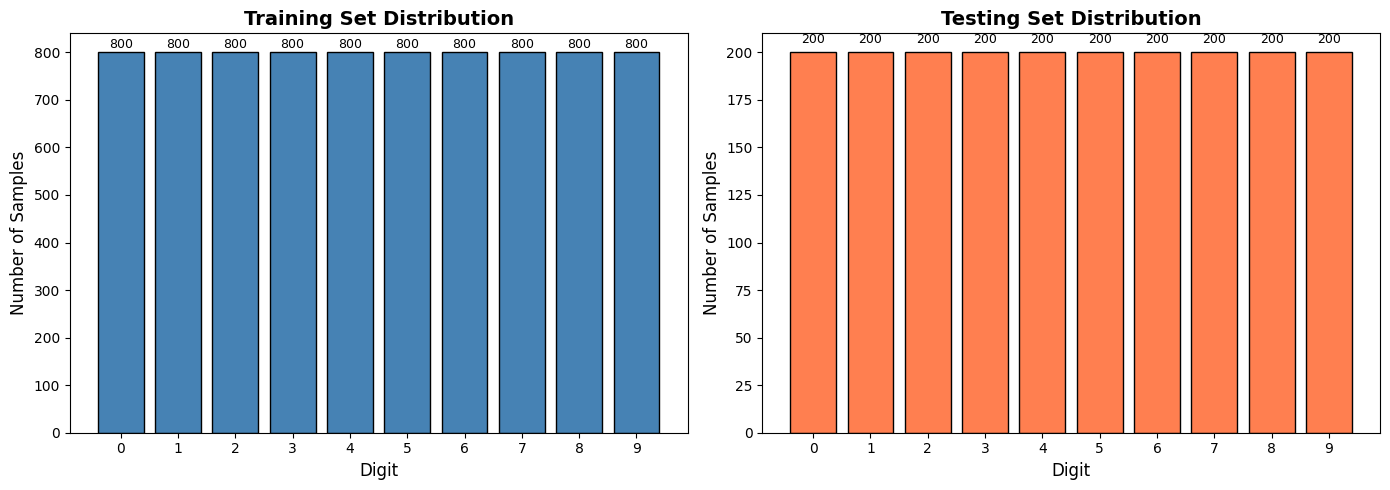

✅ Both sets have balanced class distribution (thanks to stratify=y)


In [ ]:
# Count samples per digit in training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set distribution
train_counts = [np.sum(y_train == i) for i in range(10)]
axes[0].bar(range(10), train_counts, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Digit', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_title('Training Set Distribution', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(10))
for i, count in enumerate(train_counts):
    axes[0].text(i, count + 10, str(count), ha='center', fontsize=9)

# Testing set distribution
test_counts = [np.sum(y_test == i) for i in range(10)]
axes[1].bar(range(10), test_counts, color='coral', edgecolor='black')
axes[1].set_xlabel('Digit', fontsize=12)
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].set_title('Testing Set Distribution', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(10))
for i, count in enumerate(test_counts):
    axes[1].text(i, count + 5, str(count), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("✅ Both sets have balanced class distribution (thanks to stratify=y)")

## Step 9: Save Processed Data

Now we save the processed data to files so we can reuse them later without re-processing.

Files saved:
- `X_train.npy` - Training features (8000 × 784)
- `X_test.npy` - Testing features (2000 × 784)
- `y_train.npy` - Training labels (8000,)
- `y_test.npy` - Testing labels (2000,)

In [ ]:
# Create the processed data directory if it doesn't exist
PROCESSED_DATA_PATH.mkdir(parents=True, exist_ok=True)

# Save as numpy files (.npy) - efficient for numerical data
np.save(PROCESSED_DATA_PATH / "X_train.npy", X_train)
np.save(PROCESSED_DATA_PATH / "X_test.npy", X_test)
np.save(PROCESSED_DATA_PATH / "y_train.npy", y_train)
np.save(PROCESSED_DATA_PATH / "y_test.npy", y_test)

print("💾 Processed data saved successfully!")
print(f"\n📁 Files saved to: {PROCESSED_DATA_PATH.resolve()}")
print(f"   • X_train.npy ({X_train.nbytes / 1024 / 1024:.2f} MB)")
print(f"   • X_test.npy  ({X_test.nbytes / 1024 / 1024:.2f} MB)")
print(f"   • y_train.npy ({y_train.nbytes / 1024:.2f} KB)")
print(f"   • y_test.npy  ({y_test.nbytes / 1024:.2f} KB)")

💾 Processed data saved successfully!

📁 Files saved to: D:\ML Project\data\processed
   • X_train.npy (23.93 MB)
   • X_test.npy  (5.98 MB)
   • y_train.npy (62.50 KB)
   • y_test.npy  (15.62 KB)


## Step 10: Final Summary

Let's display a complete summary of everything we've done!

In [ ]:
# Print final summary
print("=" * 60)
print("📊 DATA PREPROCESSING COMPLETE - FINAL SUMMARY")
print("=" * 60)

print(f"\n🖼️ IMAGE PROCESSING:")
print(f"   • Original format: JPG images in folders 0-9")
print(f"   • Processed format: Flattened 784-dimensional vectors")
print(f"   • Image size: 28×28 pixels → 784 features")

print(f"\n⚖️ NORMALIZATION:")
print(f"   • Original range: [0, 255]")
print(f"   • Normalized range: [0.0, 1.0]")

print(f"\n📈 DATASET STATISTICS:")
print(f"   • Total samples: {len(y_train) + len(y_test):,}")
print(f"   • Training samples: {len(y_train):,} ({len(y_train)/(len(y_train)+len(y_test))*100:.0f}%)")
print(f"   • Testing samples: {len(y_test):,} ({len(y_test)/(len(y_train)+len(y_test))*100:.0f}%)")
print(f"   • Number of classes: 10 (digits 0-9)")
print(f"   • Features per sample: {X_train.shape[1]}")

print(f"\n💾 SAVED FILES:")
print(f"   • X_train.npy: {X_train.shape}")
print(f"   • X_test.npy:  {X_test.shape}")
print(f"   • y_train.npy: {y_train.shape}")
print(f"   • y_test.npy:  {y_test.shape}")

print("\n" + "=" * 60)
print("✅ Ready for model training!")
print("=" * 60)

📊 DATA PREPROCESSING COMPLETE - FINAL SUMMARY

🖼️ IMAGE PROCESSING:
   • Original format: JPG images in folders 0-9
   • Processed format: Flattened 784-dimensional vectors
   • Image size: 28×28 pixels → 784 features

⚖️ NORMALIZATION:
   • Original range: [0, 255]
   • Normalized range: [0.0, 1.0]

📈 DATASET STATISTICS:
   • Total samples: 10,000
   • Training samples: 8,000 (80%)
   • Testing samples: 2,000 (20%)
   • Number of classes: 10 (digits 0-9)
   • Features per sample: 784

💾 SAVED FILES:
   • X_train.npy: (8000, 784)
   • X_test.npy:  (2000, 784)
   • y_train.npy: (8000,)
   • y_test.npy:  (2000,)

✅ Ready for model training!


---

## 📚 How to Load Processed Data (For Future Use)

In your model training notebooks, you can load the processed data like this:

```python
import numpy as np

# Load the processed data
X_train = np.load("../data/processed/X_train.npy")
X_test = np.load("../data/processed/X_test.npy")
y_train = np.load("../data/processed/y_train.npy")
y_test = np.load("../data/processed/y_test.npy")

print(f"Data loaded successfully!")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
```

---

## ✅ Task Checklist (from omar.md)

| Task | Status |
|------|--------|
| Load the DIDA (10k) dataset | ✅ Complete |
| Convert images to 784-dimensional feature vectors | ✅ Complete |
| Normalize pixel values to range [0,1] | ✅ Complete |
| Split dataset into training (80%) and testing (20%) | ✅ Complete |
| Save processed datasets for reuse | ✅ Complete |

**Next Step:** Model Implementation (MLP, Logistic Regression, Linear Regression, Naive Bayes)